In [3]:
import os
import json
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import statistics

from scipy.stats import ttest_ind, shapiro, mannwhitneyu

In [5]:
path = r'corpus_finished'

# Load German tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load('de_core_news_md')

# Function to extract adverbs from a text
def extract_adverbs(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ == 'ADV']

# Initialize data structures
adverbs_gender = {'m': Counter(), 'w': Counter()}
adverb_ratios_gender = {'m': [], 'w': []}

# Iterate over .json files
for filename in os.listdir(path):
    if filename.endswith('.json'):
        with open(os.path.join(path, filename), 'r', encoding='utf-8') as f:
            data = json.load(f)
            gender = data['gender']
            poem_text = ' '.join(line['text'] for line in data['poem'].values())
            adverbs = extract_adverbs(poem_text)
            ratio = len(adverbs) / len(poem_text.split())
            adverbs_gender[gender].update(adverbs)
            adverb_ratios_gender[gender].append(ratio)

# Calculate average adverb ratios for each gender and category
average_ratios_gender = {gender: sum(ratios) / len(ratios) for gender, ratios in adverb_ratios_gender.items()}

all_genders = sorted(list(average_ratios_gender.keys()))

# Create a bar chart for each category, comparing genders
#bar_width = 0.35
#index = np.arange(len(selected_categories))

#plt.figure(figsize=(5, 5))

#for i, gender in enumerate(all_genders):
#    ratios = [average_ratios_gender_category[gender].get(category, 0) for category in selected_categories]
#    plt.bar(index + i * bar_width, ratios, bar_width, label=gender)

#plt.title('Average Relative Adverb Ratio by Selected Categories and Gender')
#plt.xlabel('Category')
#plt.ylabel('Average Relative Adverb Ratio')
#plt.xticks(index + bar_width / 2, selected_categories, rotation=90)
#plt.legend()
#plt.tight_layout()
#plt.show()

# Print the overall, median, minimum and maximum adverb ratio for each gender
for gender in all_genders:
    all_ratios = adverb_ratios_gender[gender]
    print(f'Gender: {gender}')
    print('Overall average relative adverb ratio:', sum(all_ratios) / len(all_ratios))
    print('Median relative adverb ratio:', statistics.median(all_ratios))
    print('Minimum relative adverb ratio:', min(all_ratios))
    print('Maximum relative adverb ratio:', max(all_ratios), '\n')

# Print the 10 most common adverb for each gender and selected category
for gender in all_genders:
    print(f'Gender: {gender}')
    print('10 most common adverbs', adverbs_gender[gender].most_common(10))


Gender: m
Overall average relative adverb ratio: 0.10898755651536121
Median relative adverb ratio: 0.09523809523809523
Minimum relative adverb ratio: 0.0
Maximum relative adverb ratio: 0.4931506849315068 

Gender: w
Overall average relative adverb ratio: 0.10476787910342987
Median relative adverb ratio: 0.09722222222222222
Minimum relative adverb ratio: 0.0
Maximum relative adverb ratio: 0.34210526315789475 

Gender: m
10 most common adverbs [('nur', 63), ('so', 62), ('noch', 61), ('immer', 50), ('wieder', 45), ('hier', 44), ('auch', 43), ('doch', 42), ('mehr', 38), ('schon', 36)]
Gender: w
10 most common adverbs [('so', 50), ('auch', 40), ('noch', 37), ('nur', 36), ('wieder', 25), ('schon', 22), ('dann', 19), ('da', 19), ('immer', 18), ('doch', 17)]


In [6]:
# Funktion zum Durchführen des Shapiro-Wilk-Tests und zur Interpretation der Ergebnisse
def test_normality(data, sample_name):
    stat, p_value = shapiro(data)
    alpha = 0.05  # Signifikanzniveau
    print(f"Shapiro-Wilk-Test für {sample_name}:")
    print("Teststatistik:", stat)
    print("p-Wert:", p_value)
    if p_value > alpha:
        print(f"Die Adverbfrequenzen für {sample_name} sind normalverteilt.")
    else:
        print(f"Die Adverbfrequenzen für {sample_name} sind nicht normalverteilt.")

# Durchführung des Tests für beide Subsamples
test_normality(adverb_ratios_gender['m'], "Sample M")
test_normality(adverb_ratios_gender['w'], "Sample W")

Shapiro-Wilk-Test für Sample M:
Teststatistik: 0.8488926887512207
p-Wert: 1.918526448818625e-10
Die Adverbfrequenzen für Sample M sind nicht normalverteilt.
Shapiro-Wilk-Test für Sample W:
Teststatistik: 0.9229220747947693
p-Wert: 3.1761628633830696e-05
Die Adverbfrequenzen für Sample W sind nicht normalverteilt.


In [7]:
import scipy.stats as stats

# Perform a t-test to compare the means of the two groups
t_stat, p_val = stats.ttest_ind(adverb_ratios_gender['m'], adverb_ratios_gender['w'])

print('T-statistic:', t_stat)
print('p-value:', p_val)

T-statistic: 0.5068518772180135
p-value: 0.6127485818426899


In [8]:
# Perform the Mann-Whitney-U-Test to compare the distributions
u_stat, p_val = stats.mannwhitneyu(adverb_ratios_gender['m'], adverb_ratios_gender['w'], alternative='two-sided')

print('Mann-Whitney U-Statistik:', u_stat)
print('p-Wert:', p_val)

Mann-Whitney U-Statistik: 6630.5
p-Wert: 0.6615697287647417


In [9]:
n1 = len(adverb_ratios_gender['m'])
n2 = len(adverb_ratios_gender['w'])
effect_size = np.sqrt(u_stat / (n1 * n2))

print("Effektstärke (Cramer's V):", effect_size)

Effektstärke (Cramer's V): 0.7190257649641362


(array([ 3.,  3.,  2.,  6.,  6.,  5., 10.,  6., 11.,  6.,  8.,  4., 10.,
         5.,  0.,  1.,  2.,  2.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
         0.,  0.,  0.,  1.]),
 array([0.        , 0.01140351, 0.02280702, 0.03421053, 0.04561404,
        0.05701754, 0.06842105, 0.07982456, 0.09122807, 0.10263158,
        0.11403509, 0.1254386 , 0.13684211, 0.14824561, 0.15964912,
        0.17105263, 0.18245614, 0.19385965, 0.20526316, 0.21666667,
        0.22807018, 0.23947368, 0.25087719, 0.2622807 , 0.27368421,
        0.28508772, 0.29649123, 0.30789474, 0.31929825, 0.33070175,
        0.34210526]),
 <BarContainer object of 30 artists>)

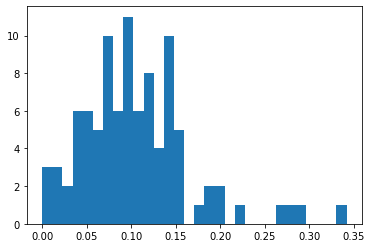

In [10]:
plt.hist(adverb_ratios_gender['w'], bins=30)

(array([ 2.,  4.,  6., 14., 23., 24., 15., 10., 10.,  9.,  4.,  4.,  3.,
         2.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.        , 0.01643836, 0.03287671, 0.04931507, 0.06575342,
        0.08219178, 0.09863014, 0.11506849, 0.13150685, 0.14794521,
        0.16438356, 0.18082192, 0.19726027, 0.21369863, 0.23013699,
        0.24657534, 0.2630137 , 0.27945205, 0.29589041, 0.31232877,
        0.32876712, 0.34520548, 0.36164384, 0.37808219, 0.39452055,
        0.4109589 , 0.42739726, 0.44383562, 0.46027397, 0.47671233,
        0.49315068]),
 <BarContainer object of 30 artists>)

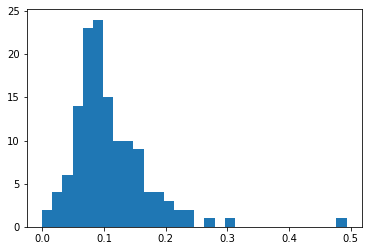

In [11]:
plt.hist(adverb_ratios_gender['m'], bins=30)